In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, homogeneity_score

from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("/home/ivana/Desktop/IP-projekat/2023_Data_Mining_Smoking_Dataset/datasets/data1.csv")
data

,Unnamed: 0,gender,age,height(cm),weight(kg),eyesight(left),hearing(left),hearing(right),relaxation,fasting blood sugar,...,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,Gtp,dental caries,tartar,smoking
0,0,0,40,155,60,1.2,1.0,1.0,73.0,94.0,...,82.0,73.0,12.9,1.0,0.7,18.0,27.0,0,1,0
1,1,0,40,160,60,0.8,1.0,1.0,70.0,130.0,...,115.0,42.0,12.7,1.0,0.6,22.0,18.0,0,1,0
2,2,1,55,170,60,0.8,1.0,1.0,86.0,89.0,...,182.0,55.0,15.8,1.0,1.0,21.0,22.0,0,0,1
3,3,1,40,165,70,1.5,1.0,1.0,60.0,96.0,...,254.0,45.0,14.7,1.0,1.0,19.0,18.0,0,1,0
4,4,0,40,155,60,1.0,1.0,1.0,74.0,80.0,...,74.0,62.0,12.5,1.0,0.6,16.0,22.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55687,0,40,170,65,0.9,1.0,1.0,68.0,89.0,...,99.0,75.0,12.3,1.0,0.6,14.0,10.0,1,1,0
55688,55688,0,45,160,50,1.2,1.0,1.0,62.0,89.0,...,69.0,73.0,14.0,1.0,0.9,20.0,14.0,0,1,0
55689,55689,0,55,160,50,1.0,1.0,1.0,72.0,88.0,...,77.0,79.0,12.4,1.0,0.5,17.0,12.0,0,0,0
55690,55690,1,60,165,60,0.8,1.0,1.0,76.0,107.0,...,79.0,48.0,14.4,1.0,0.7,20.0,18.0,0,0,0


In [3]:
data.drop('Unnamed: 0', axis=1,inplace=True)

In [4]:
Y = data['smoking']
X = data.drop('smoking', axis=1)
feature_names = X.columns
X.head()

,gender,age,height(cm),weight(kg),eyesight(left),hearing(left),hearing(right),relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,Gtp,dental caries,tartar
0,0,40,155,60,1.2,1.0,1.0,73.0,94.0,215.0,82.0,73.0,12.9,1.0,0.7,18.0,27.0,0,1
1,0,40,160,60,0.8,1.0,1.0,70.0,130.0,192.0,115.0,42.0,12.7,1.0,0.6,22.0,18.0,0,1
2,1,55,170,60,0.8,1.0,1.0,86.0,89.0,242.0,182.0,55.0,15.8,1.0,1.0,21.0,22.0,0,0
3,1,40,165,70,1.5,1.0,1.0,60.0,96.0,322.0,254.0,45.0,14.7,1.0,1.0,19.0,18.0,0,1
4,0,40,155,60,1.0,1.0,1.0,74.0,80.0,184.0,74.0,62.0,12.5,1.0,0.6,16.0,22.0,0,0


In [5]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)
X


,gender,age,height(cm),weight(kg),eyesight(left),hearing(left),hearing(right),relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,Gtp,dental caries,tartar
0,0.0,0.307692,0.416667,0.285714,0.112245,0.0,0.0,0.311321,0.104575,0.410256,0.074672,0.112378,0.493827,0.0,0.052174,0.009195,0.026052,0.0,1.0
1,0.0,0.307692,0.500000,0.285714,0.071429,0.0,0.0,0.283019,0.183007,0.351282,0.107972,0.061889,0.481481,0.0,0.043478,0.012261,0.017034,0.0,1.0
2,1.0,0.538462,0.666667,0.285714,0.071429,0.0,0.0,0.433962,0.093682,0.479487,0.175580,0.083062,0.672840,0.0,0.078261,0.011494,0.021042,0.0,0.0
3,1.0,0.307692,0.583333,0.380952,0.142857,0.0,0.0,0.188679,0.108932,0.684615,0.248234,0.066775,0.604938,0.0,0.078261,0.009962,0.017034,0.0,1.0
4,0.0,0.307692,0.416667,0.285714,0.091837,0.0,0.0,0.320755,0.074074,0.330769,0.066599,0.094463,0.469136,0.0,0.043478,0.007663,0.021042,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0.0,0.307692,0.666667,0.333333,0.081633,0.0,0.0,0.264151,0.093682,0.405128,0.091826,0.115635,0.456790,0.0,0.043478,0.006130,0.009018,1.0,1.0
55688,0.0,0.384615,0.500000,0.190476,0.112245,0.0,0.0,0.207547,0.093682,0.284615,0.061554,0.112378,0.561728,0.0,0.069565,0.010728,0.013026,0.0,1.0
55689,0.0,0.538462,0.500000,0.190476,0.091837,0.0,0.0,0.301887,0.091503,0.264103,0.069627,0.122150,0.462963,0.0,0.034783,0.008429,0.011022,0.0,0.0
55690,1.0,0.615385,0.583333,0.285714,0.071429,0.0,0.0,0.339623,0.132898,0.397436,0.071645,0.071661,0.586420,0.0,0.052174,0.010728,0.017034,0.0,0.0


In [6]:
pca = PCA(n_components=6)
X = pca.fit_transform(X)

In [7]:
pca.explained_variance_ratio_[:6].sum()

0.9317994862467228

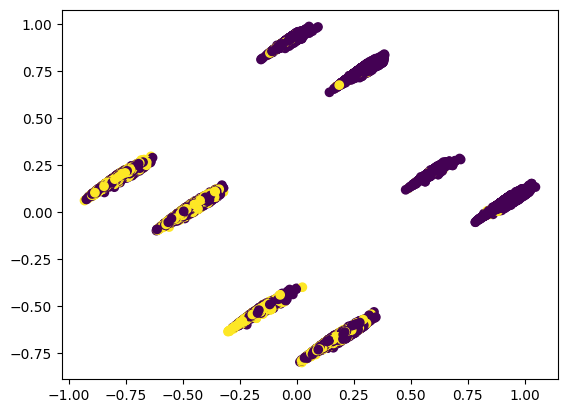

In [8]:
_ = plt.scatter(X[:, 0], X[:, 1], c=Y)

Izbor broja klastera:

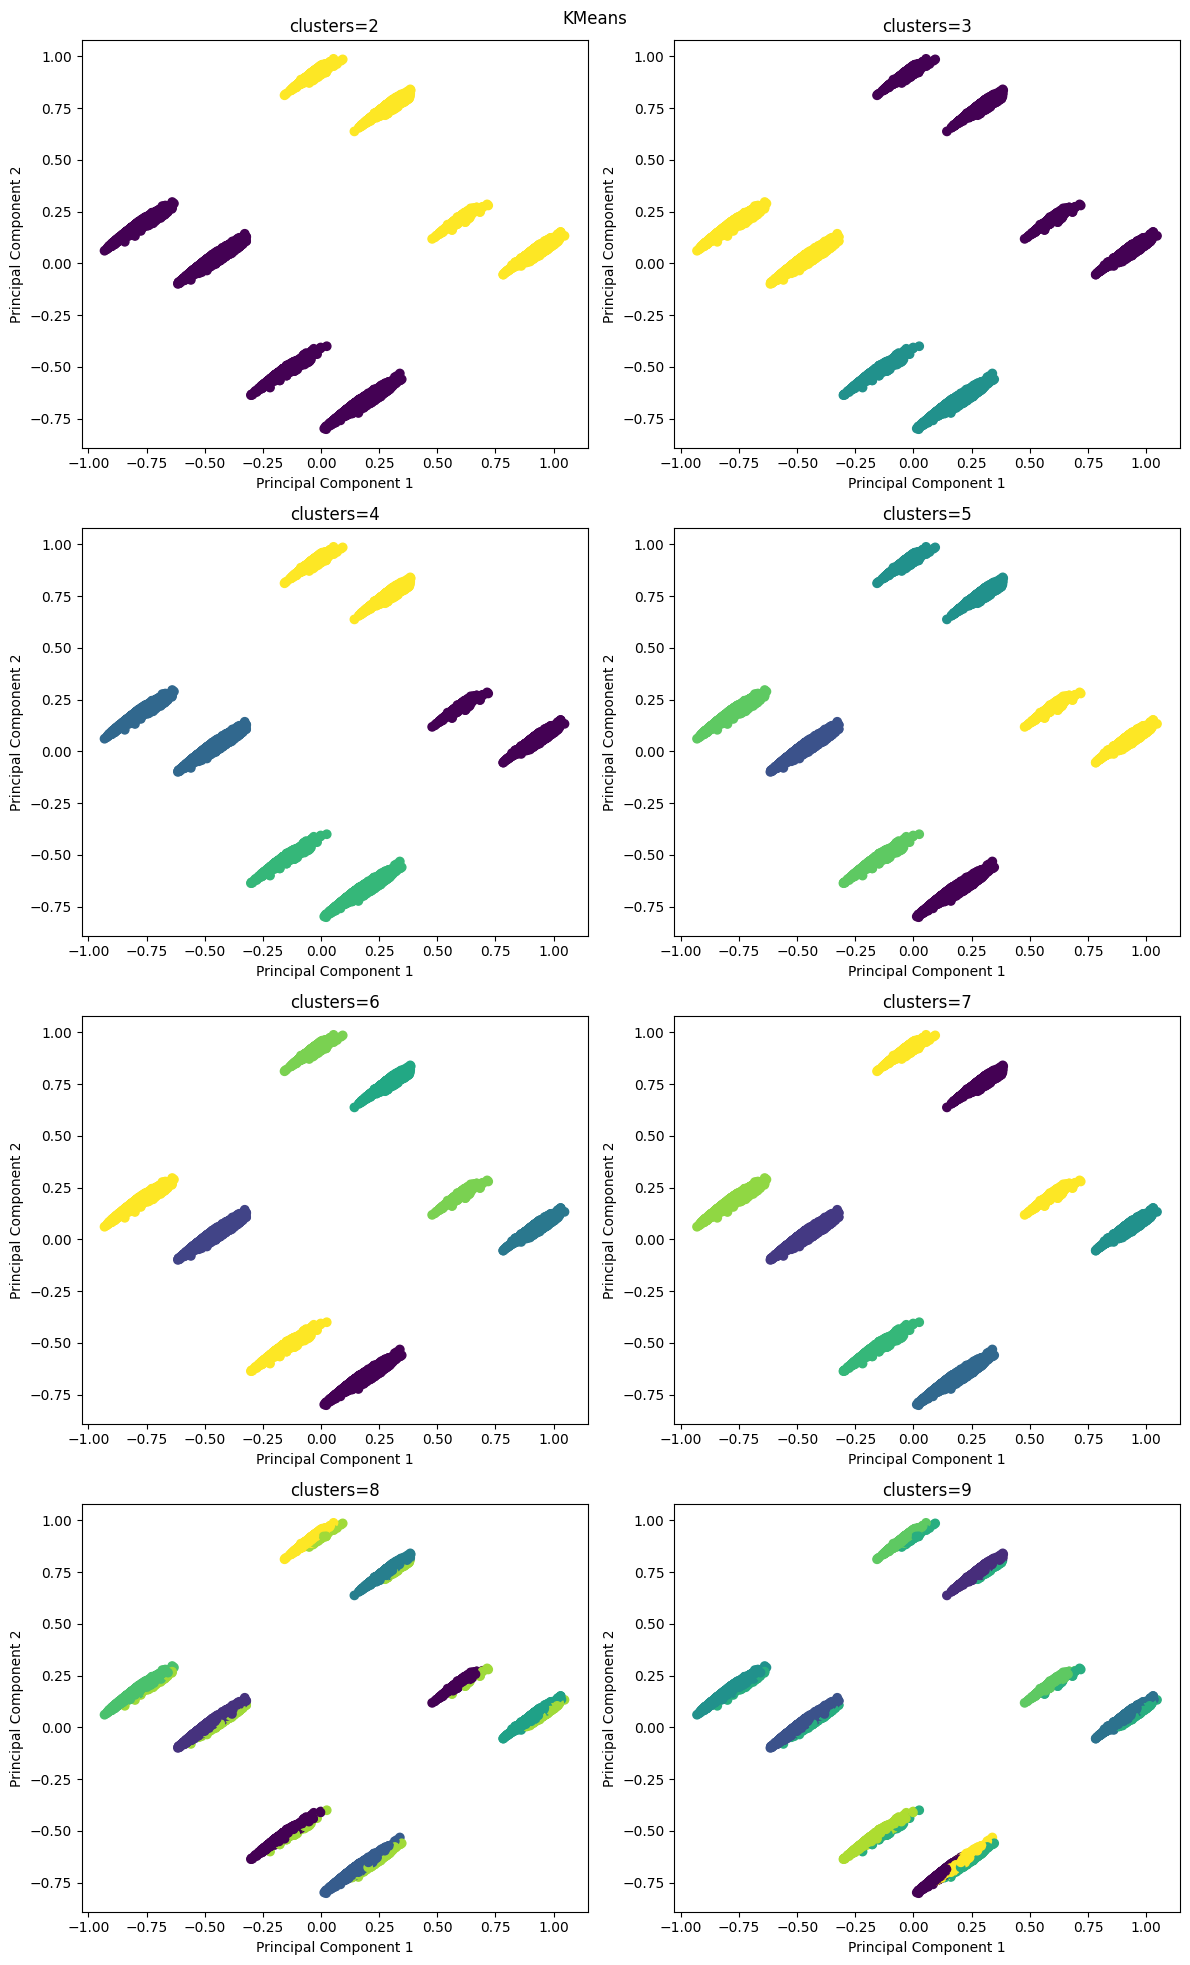

In [9]:
ks = [i for i in range(2, 10)]
sse = []
silhouettes = []

fig, axs = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle("KMeans")

for k, ax in zip(ks, axs.flatten()):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)

    ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
    ax.set_title(f"clusters={k}")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

    sse.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, kmeans.labels_))

plt.tight_layout()
plt.show()

In [10]:
sse

[27868.937642612193,
 19009.095755824357,
 13875.725389157884,
 9274.507485629027,
 7238.664350939329,
 5583.531129075182,
 4629.802280826014,
 4123.869803793817]

In [11]:
silhouettes

[0.38317385375839524,
 0.44811449662025893,
 0.5374185532478314,
 0.6055843741374239,
 0.6455659965948592,
 0.6854471907554088,
 0.6982402274680939,
 0.6407248503699841]

Text(0, 0.5, 'Skor silueta')

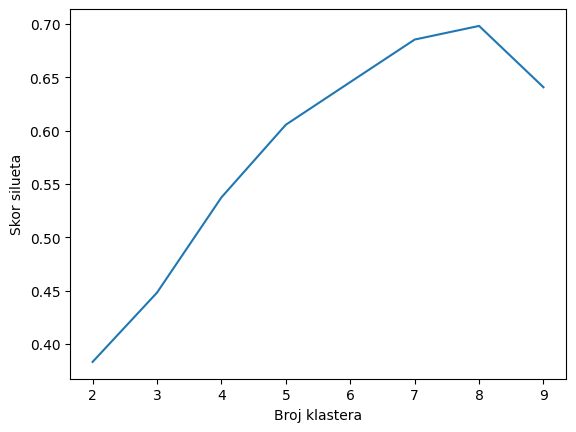

In [12]:
plt.plot(ks, silhouettes)
plt.xlabel('Broj klastera')
plt.ylabel('Skor silueta')


Text(0, 0.5, 'Skor sse')

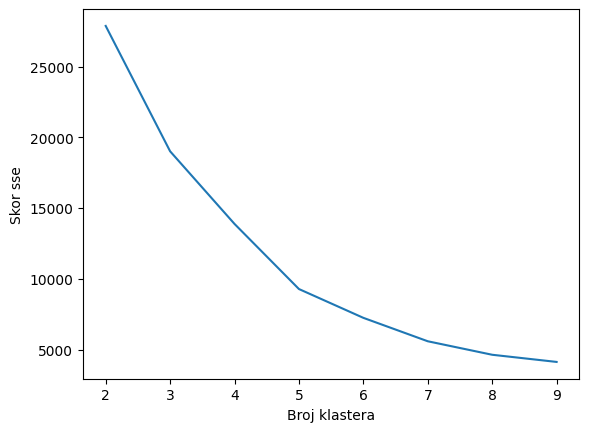

In [13]:
plt.plot(ks, sse)
plt.xlabel('Broj klastera')
plt.ylabel('Skor sse')


Uzecemo 4 klastera jer silueta skor tu pravi najveci skok (da ne idemo do maksimalnog broja).

In [26]:
km = KMeans(n_clusters=4, n_init=100, max_iter=500, init='random')
km.fit(X)

KMeans(init='random', max_iter=500, n_clusters=4, n_init=100)

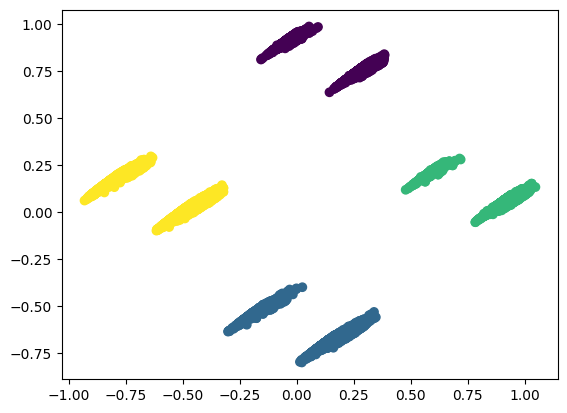

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=km.labels_)

In [28]:
# Silueta
silhouette_score(X, km.labels_, metric='euclidean')

0.5374185532478314

In [29]:
# Homogenost klastera
homogeneity_score(labels_true=Y, labels_pred=km.labels_)

0.2434588824635009

In [30]:
# koja instanca pripada kom klasteru
X[km.labels_ == 0]

array([[ 0.24786858,  0.73422973, -0.26581316, -0.12145573,  0.09109644,
         0.00332974],
       [ 0.23377718,  0.72066986, -0.26801739, -0.12980394,  0.10705581,
         0.01174728],
       [-0.1047299 ,  0.85836981,  0.66036352, -0.07711784,  0.04577502,
         0.24234886],
       ...,
       [ 0.31311429,  0.78132212, -0.26731932,  0.06755509, -0.14765166,
        -0.13186098],
       [-0.10816279,  0.85654266,  0.66276592, -0.13121562,  0.12630652,
         0.08503832],
       [ 0.24831039,  0.72975817, -0.26886019, -0.08767798,  0.05634589,
        -0.10445602]])

In [31]:
#Racuna silueta skor za svaku tacku u odnosu na klaster kom pripada
from sklearn.metrics import silhouette_samples

silhouette_values = silhouette_samples(X, kmeans.labels_)
silhouette_values

array([0.81267789, 0.80245268, 0.45777605, ..., 0.80305813, 0.54974508,
       0.68401243])